## Importing Libraries

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from typing import Callable

%matplotlib ipympl

## Plot Function

In [73]:
def processDataSet(filename: str) -> tuple[np.array, np.array]:
    """
    Function takes in a filename as a string,
    and returns the x and y values in a numpy array
    """
    x = []
    y = []
    with open(filename, "r") as file:
        data = file.readlines()
        for i in data:
            x.append(float(i.split(",")[0]))
            y.append(float(i.split(",")[1].strip()))
    x = np.array(x)
    y = np.array(y)
    return x, y

In [74]:
def plotDataSet(filename: str):
    """
    functiton takes in a filename, and plots the
    values using matplotltib
    """
    x, y = processDataSet(filename)
    plt.figure()
    plt.plot(x, y)

#### Plotting the datasets

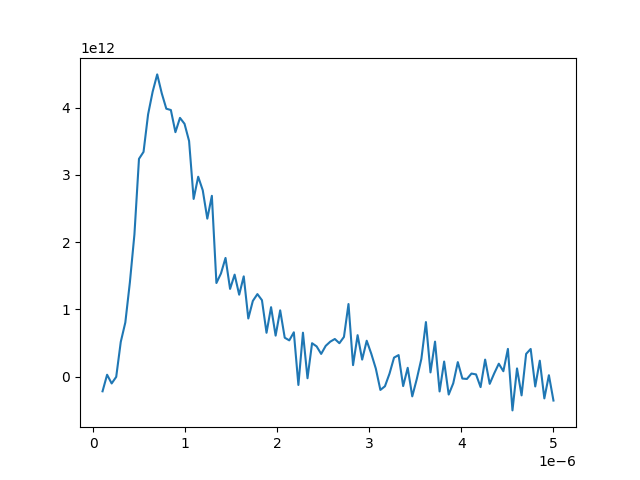

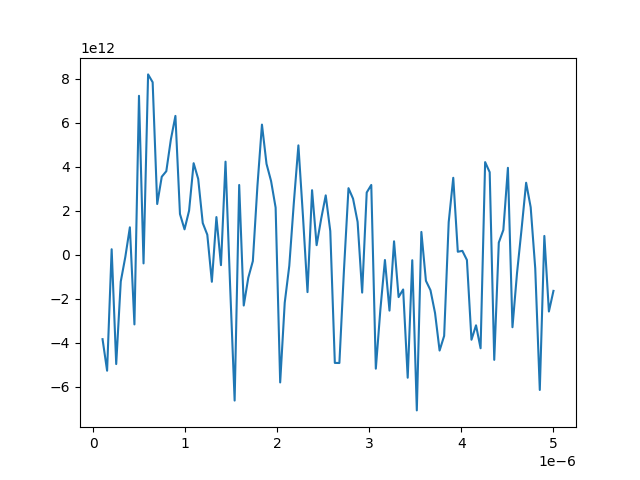

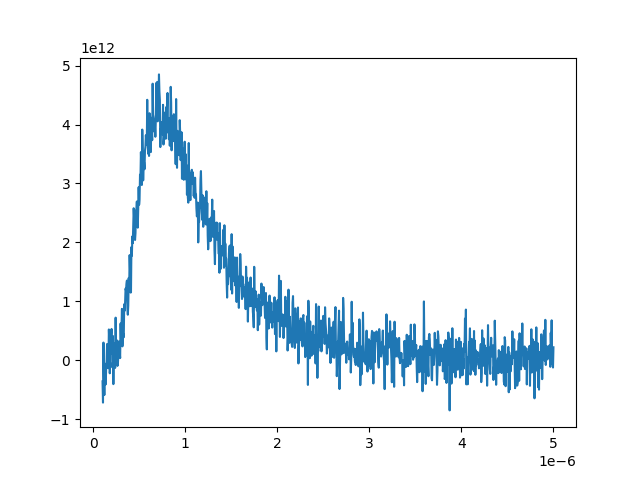

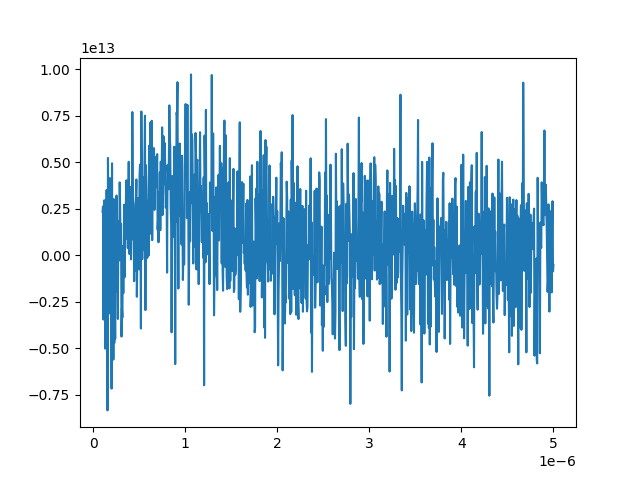

In [75]:
plotDataSet("d1.txt")
plotDataSet("d2.txt")
plotDataSet("d3.txt")
plotDataSet("d4.txt")

## Function plancks Law

In [76]:
def plancksLaw(Ld: float, T: float, h: float, c: float, k: float) -> float:
    """
    function takes in parameters for spectral radiance,
    and returns spectral radiance
    """
    B = (2 * h * np.power(c, 2)) / (
        np.power(Ld, 5) * (np.exp(h * c / (Ld * k * T)) - 1)
    )
    return B

## Curve Fitting

### All parameters not fixed

#### Function for curve fitting and plotting

In [77]:
def plotFit(initial_conditions: np.array, dataset: str, func: Callable):
    """
    function takes in initial conditions for curve fitting,
    path to a dataset, and a function
    for the curve
    """
    x, y = processDataSet(dataset)

    params, params_covariance = sp.optimize.curve_fit(func, x, y, p0=initial_conditions)
    print(params)
    plt.figure()
    plt.plot(x, y)
    plt.plot(x, func(x, *params))

#### Trying different datasets, with different initial conditions

[5.55515913e+02 1.06622681e-30 7.37264573e+06 3.97525956e-21]
[4.66650814e+02 1.16100271e-30 6.97704120e+06 4.87777260e-21]
[1.36605968e+00 9.97961713e-35 6.21229370e+08 1.35960442e-20]
[1.96117332e+00 2.66207388e-34 4.60032417e+08 1.71385208e-20]


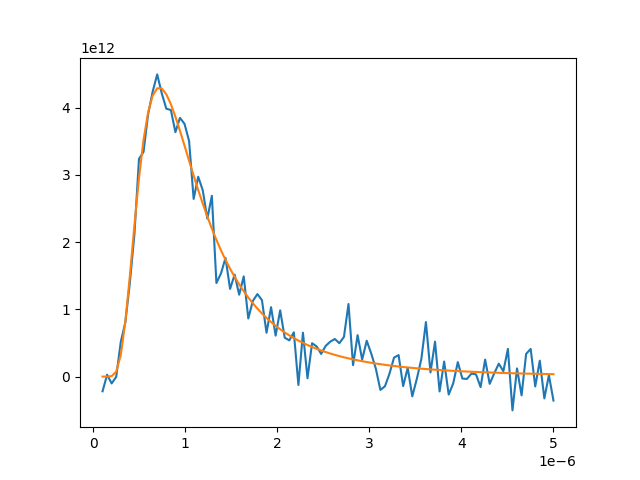

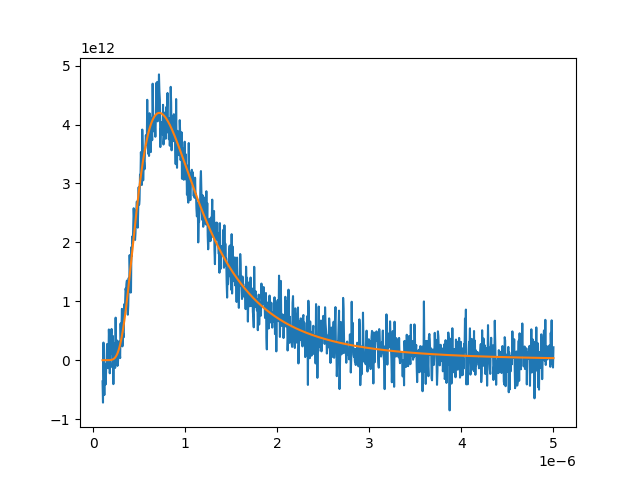

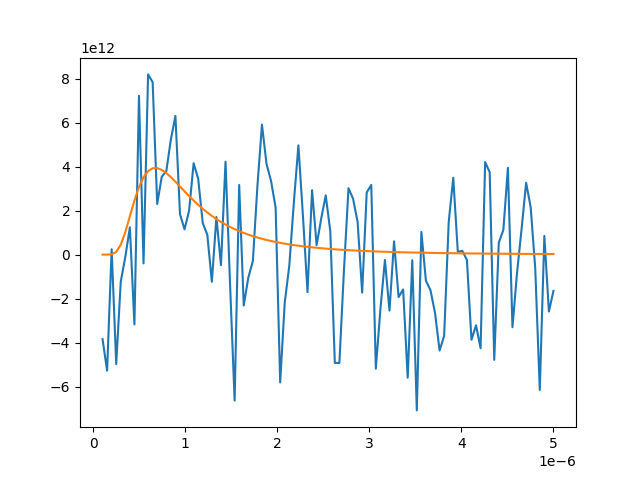

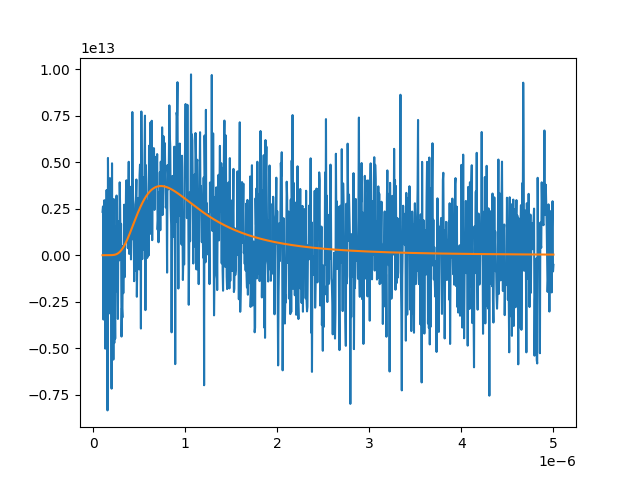

In [91]:
initial_conditions = np.array([1000, 1e-30, 1e8, 1e-20])
plotFit(initial_conditions, "d1.txt", plancksLaw)
plotFit(initial_conditions, "d3.txt", plancksLaw)

initial_conditions = np.array(
    [1, 1e-34, 3e8, 1e-20]
)  # modified initial conditions for d2 and d4

plotFit(initial_conditions, "d2.txt", plancksLaw)
plotFit(initial_conditions, "d4.txt", plancksLaw)

## Fixing Parameters

### Leaving T as a variable

In [79]:
def newPlancksLaw(Ld: float, T: float) -> float:
    """
    new wrapper for plancks law with
    all parameters except T fixed.
    """
    h = float(6.64 * 1e-34)
    c = float(3 * 1e8)
    k = float(1.38 * 1e-23)
    B = plancksLaw(Ld, T, h, c, k)
    return B

[4010.74559518]
[4030.09404732]
[3966.80947863]
[3914.61099052]


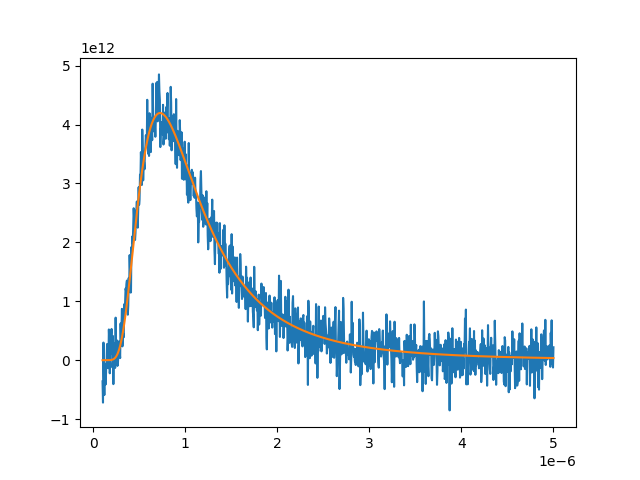

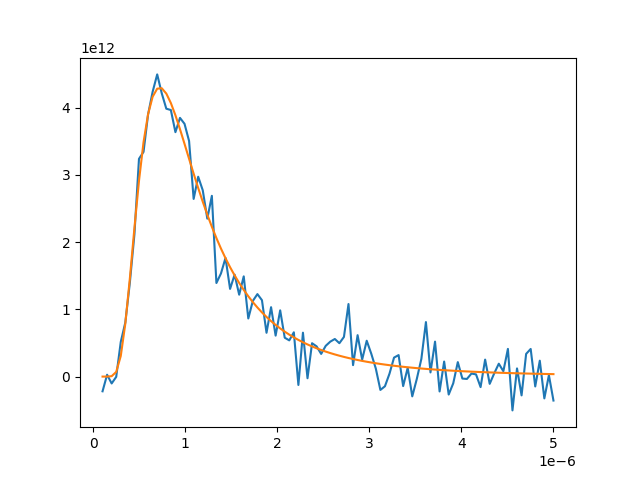

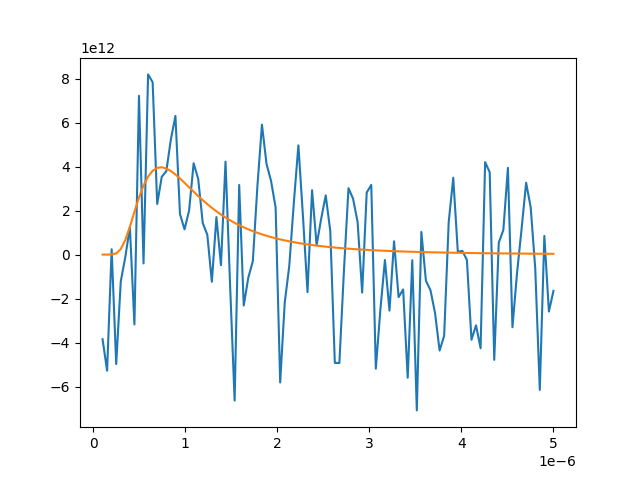

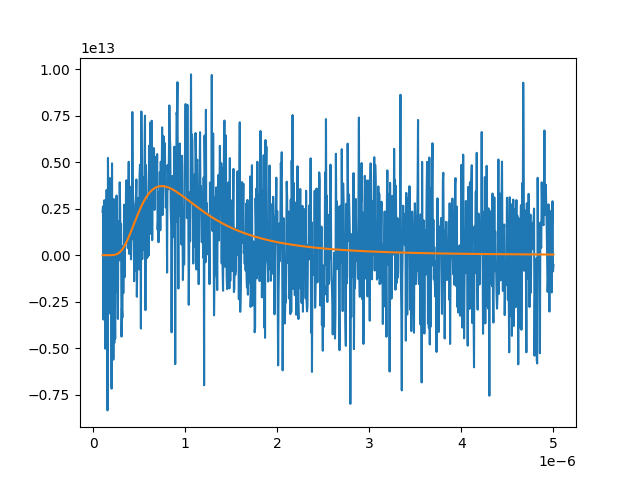

In [84]:
# trying to fit for each dataset

initial_conditions = np.array([1000])  # initial guess of 1000K
plotFit(initial_conditions, "d3.txt", newPlancksLaw)
initial_conditions = np.array([1000])  # initial guess of 1000K
plotFit(initial_conditions, "d1.txt", newPlancksLaw)
initial_conditions = np.array([10000])  # initial guess of 10000K
plotFit(initial_conditions, "d2.txt", newPlancksLaw)
initial_conditions = np.array([1000])  # initial guess of 1000K
plotFit(initial_conditions, "d4.txt", newPlancksLaw)

### Leaving c as variable

In [85]:
def newPlancksLaw(Ld, c):
    """
    returns spectral radiance, after fixing values for everything
    except
    """
    h = float(6.64e-34)
    T = float(4010.74559518)
    k = float(1.38 * 1e-23)
    B = plancksLaw(Ld=Ld, T=T, h=h, c=c, k=k)
    return B

#### trying with each dataset

[2.99623193e+08]
[2.97492061e+08]
[3.0102942e+08]
[3.11609609e+08]


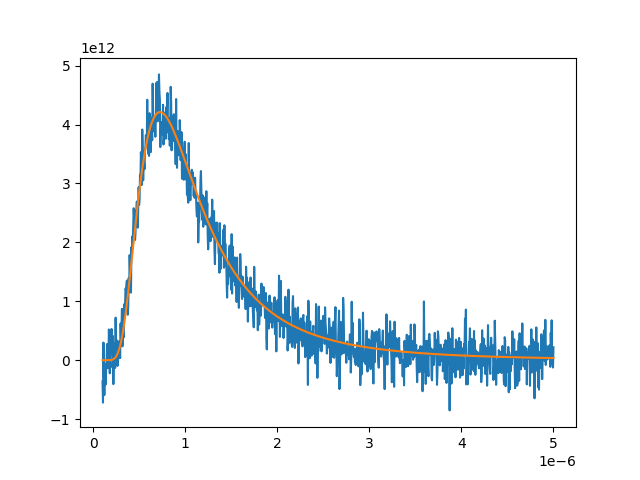

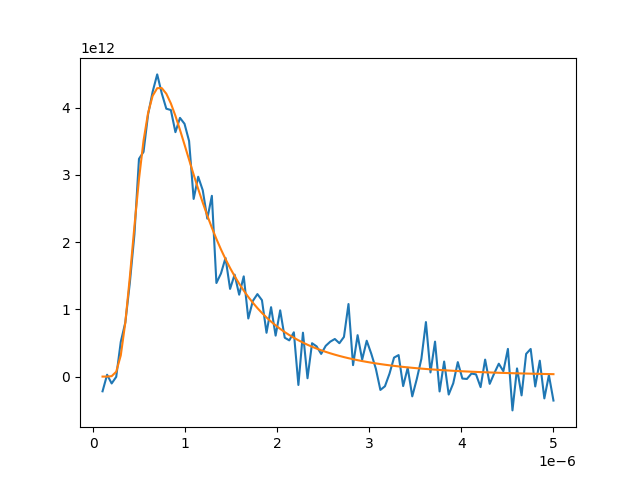

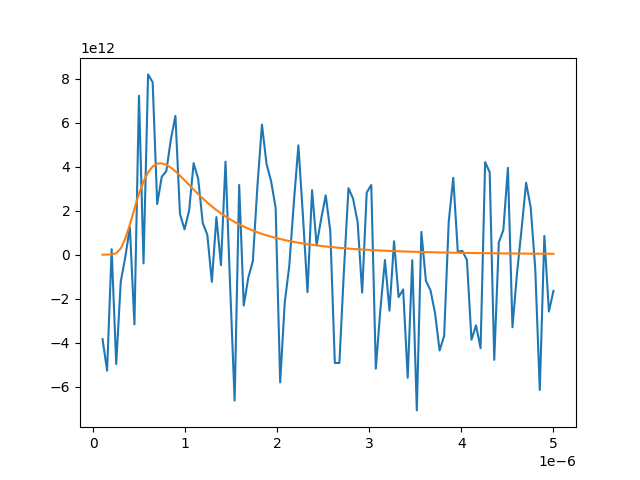

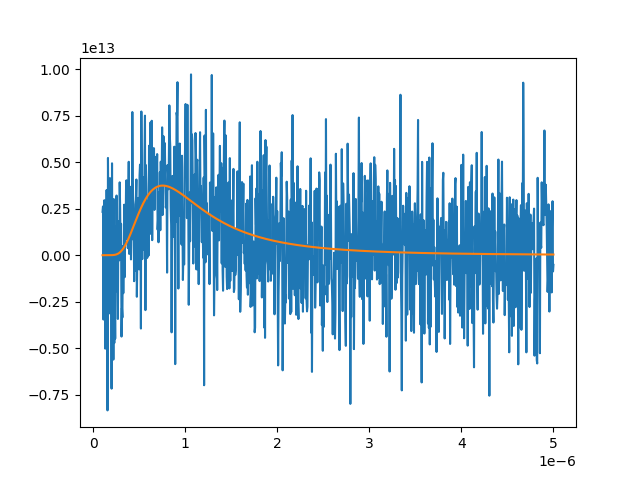

In [86]:
initial_conditions = 1e8
plotFit(initial_conditions, "d3.txt", newPlancksLaw)
plotFit(initial_conditions, "d1.txt", newPlancksLaw)
plotFit(initial_conditions, "d2.txt", newPlancksLaw)
plotFit(initial_conditions, "d4.txt", newPlancksLaw)

### Leaving h as variable

[6.64387195e-34]
[6.60528676e-34]
[6.70937589e-34]
[6.84811056e-34]


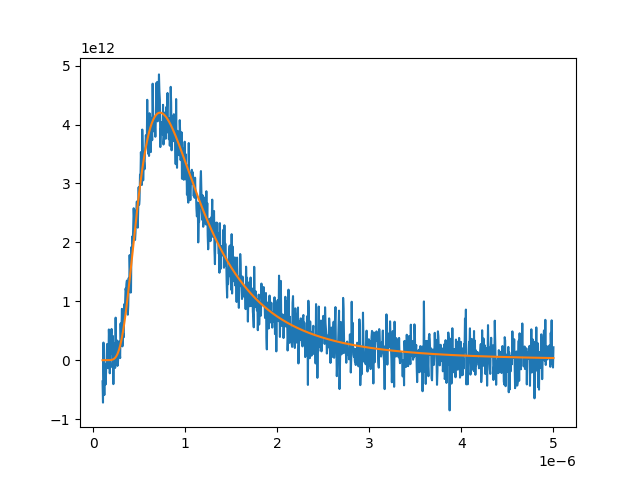

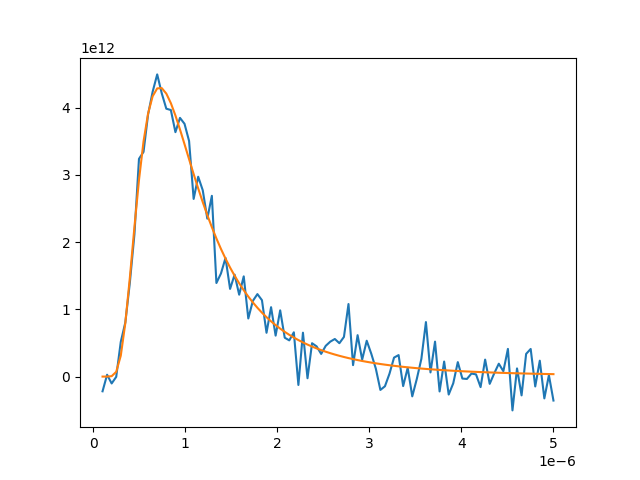

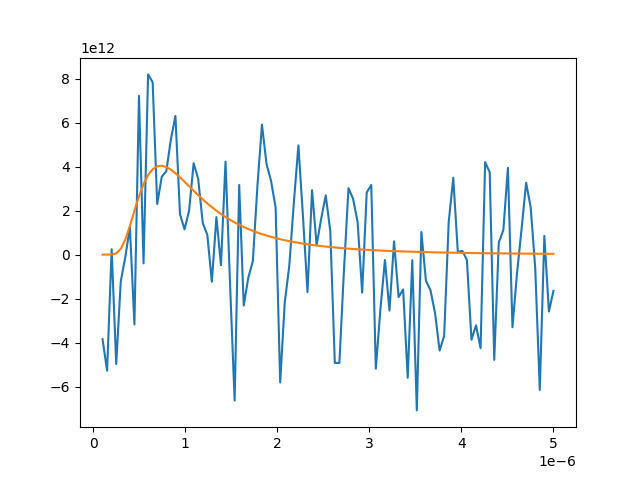

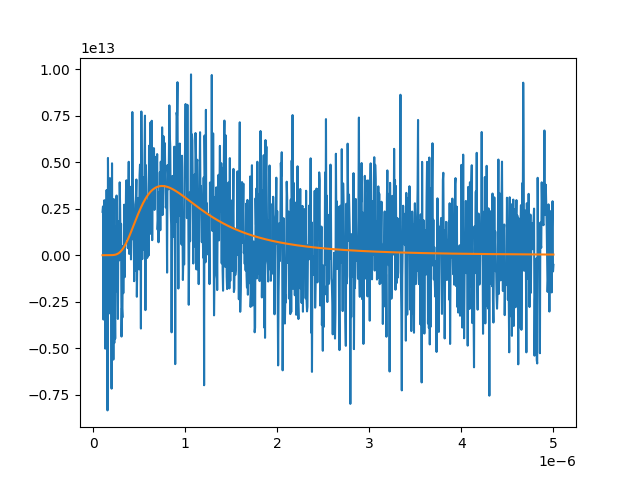

In [87]:
def newPlanksLaw(Ld, h):
    """
    returns spectral radiance, after fixing values for everything
    except
    """
    c = float(2.99623193e08)
    T = float(4010.74559518)
    k = float(1.38 * 1e-23)
    B = plancksLaw(Ld=Ld, T=T, h=h, c=c, k=k)
    return B


initial_conditions = float(1e-34)
# trying to fit for each dataset
plotFit(initial_conditions, "d3.txt", newPlanksLaw)
plotFit(initial_conditions, "d1.txt", newPlanksLaw)
plotFit(initial_conditions, "d2.txt", newPlanksLaw)
plotFit(initial_conditions, "d4.txt", newPlanksLaw)

### Leaving K as variable

In [88]:
def newPlanksLaw(Ld, k):
    """
    returns spectral radiance, after fixing values for everything
    except k
    """
    c = float(2.99623193e08)
    T = float(4010.74559518)
    h = float(6.64387195e-34)
    B = plancksLaw(Ld=Ld, T=T, h=h, c=c, k=k)
    return B

[1.37960956e-23]
[1.38626341e-23]
[1.36449892e-23]
[1.34654473e-23]


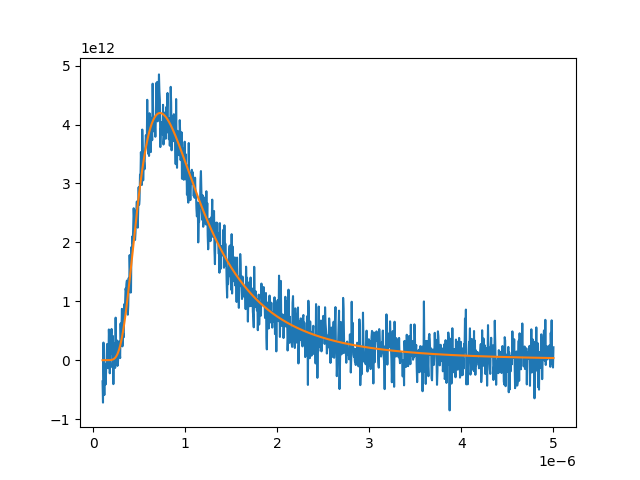

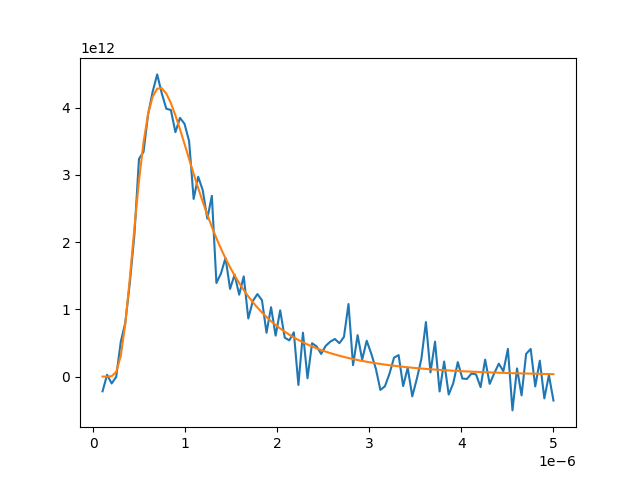

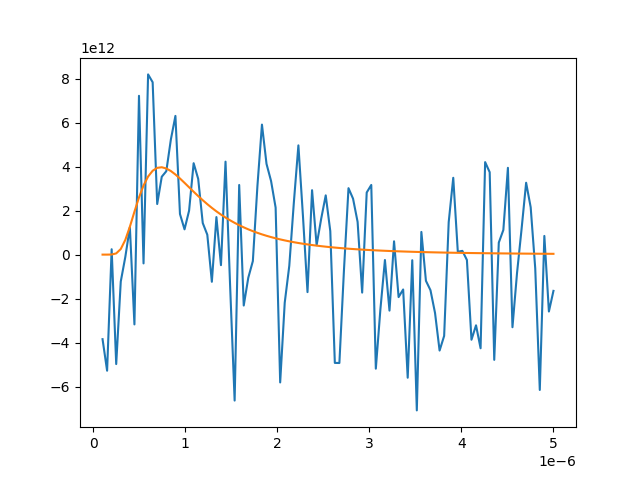

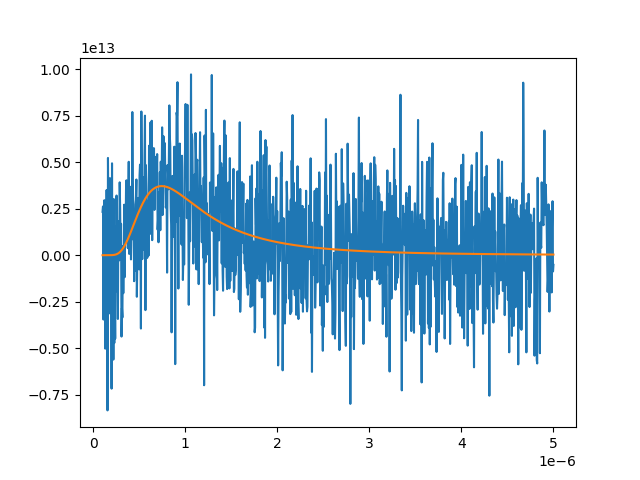

In [89]:
initial_conditions = float(1e-23)
# trying to fit for each dataset
plotFit(initial_conditions, "d3.txt", newPlanksLaw)
plotFit(initial_conditions, "d1.txt", newPlanksLaw)
plotFit(initial_conditions, "d2.txt", newPlanksLaw)
plotFit(initial_conditions, "d4.txt", newPlanksLaw)